<a href="https://colab.research.google.com/github/EmelieNguyen/AI-Transportation-Course-Submissions/blob/main/Assignment_2_Submission_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the basic knowledge for Classification

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'The sun sets over the quiet meadow.',
    'Birds chirp softly in the early morning.',
    'A gentle breeze rustles the autumn leaves.',
    'Stars twinkle brightly in the clear night sky.'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english"
# to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names
# (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original
# list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert
# the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few
# rows of the matrix
df.head()

,autumn,birds,breeze,brightly,chirp,clear,early,gentle,leaves,meadow,morning,night,quiet,rustles,sets,sky,softly,stars,sun,twinkle
Line 1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
Line 2,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
Line 3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
Line 4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1


## Load the dataset

In [2]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


## Download function & Split/train data

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import os

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## TfidfVectorizer

{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
Logistic Regression Accuracy: 0.9620853080568721


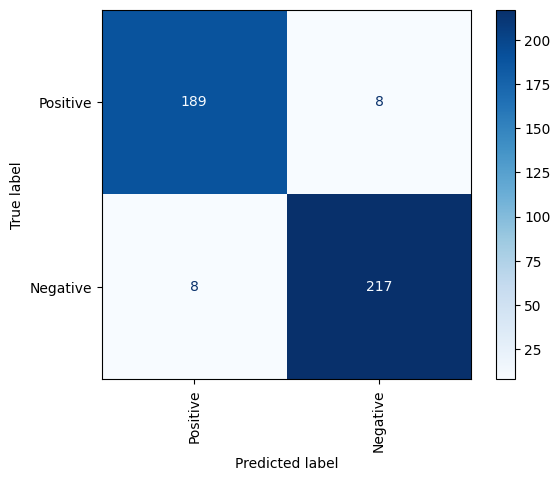

In [4]:
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)


x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)


logreg = LogisticRegression(max_iter=1000, random_state=0)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy)

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()

{'n_neighbors': 9, 'weights': 'distance'}
K-Nearest Neighbor accuracy：0.9146919431279621


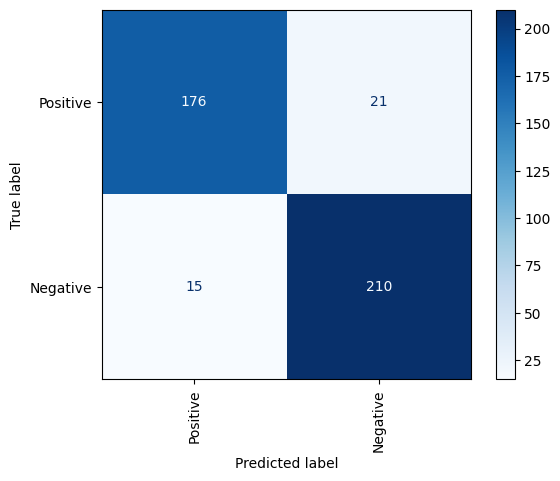

In [5]:
# K-nearest Neighbor
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_knn_model = grid_search.best_estimator_

y_pred = best_knn_model.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor accuracy：'+ str(accuracy))

ConfusionMatrixDisplay.from_estimator(
    best_knn_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 0.25, 'max_samples': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best 3-fold CV accuracy: 0.9532
Test accuracy: 0.9668

Classification report:
               precision    recall  f1-score   support

           0     0.9692    0.9594    0.9643       197
           1     0.9648    0.9733    0.9690       225

    accuracy                         0.9668       422
   macro avg     0.9670    0.9664    0.9667       422
weighted avg     0.9668    0.9668    0.9668       422



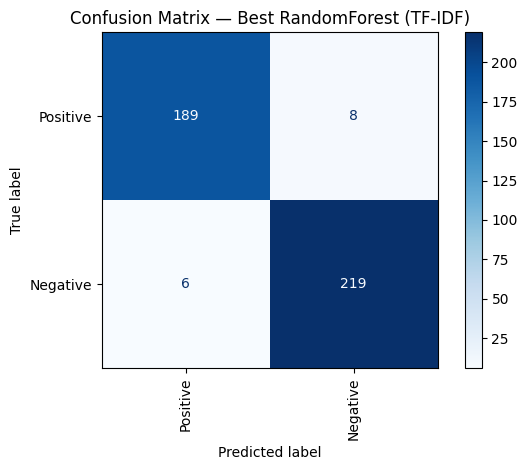

In [6]:
# Random Forest
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Slim, speed-friendly grid
param_grid = {
    'n_estimators': [100, 200],        # fewer trees
    'max_depth': [None, 20],           # shallow vs unlimited
    'max_features': ['sqrt', 0.25],    # feature subsampling
    'min_samples_split': [5, 10],      # regularize splits
    'min_samples_leaf': [2, 4],        # regularize leaves
    'bootstrap': [True],
    'max_samples': [0.8],              # fixed row subsample (speeds each tree)
    'criterion': ['gini'],             # faster than log_loss
    'class_weight': [None, 'balanced_subsample']
}

grid_search = GridSearchCV(
    rf, param_grid,
    cv=3,                  # fewer folds
    scoring='accuracy',    # switch to 'f1_macro' if imbalance matters
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid_search.fit(x_train_vectorized, y_train)

print("Best params:", grid_search.best_params_)
print("Best 3-fold CV accuracy:", round(grid_search.best_score_, 4))

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(x_test_vectorized)
print("Test accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_rf_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — Best RandomForest (TF-IDF)")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:56:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost accuracy: 0.966824644549763


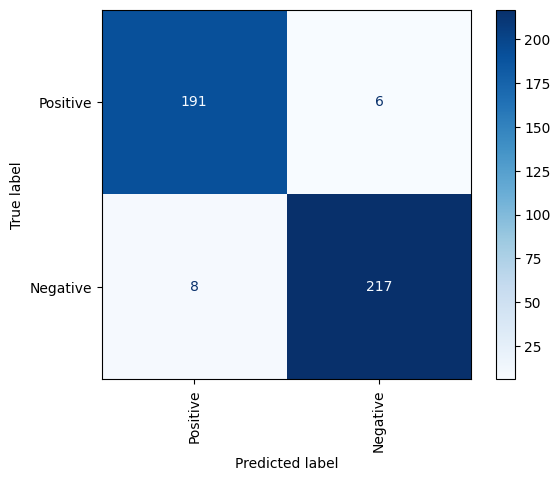

In [7]:
# XGBoost

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_vectorized, y_train)

print(grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print('XGBoost accuracy: ' + str(accuracy))

ConfusionMatrixDisplay.from_estimator(
    best_xgb_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()

{'C': 1, 'kernel': 'rbf'}
SVM accuracy: 0.9620853080568721


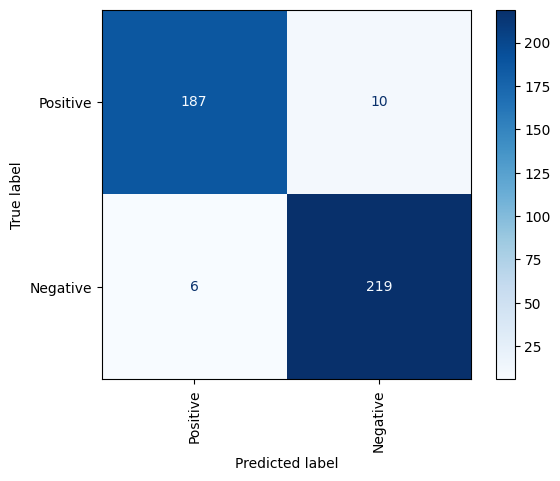

In [8]:
# SVM

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model= SVC(probability=True)

param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

print('SVM accuracy: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.95260663507109


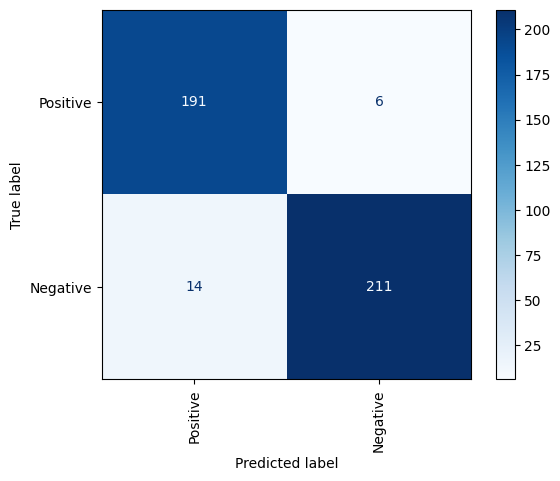

In [9]:
# Naive Bayes
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

accuracy_nb_count = accuracy_score(y_test,model.predict(x_test_vectorized))
print('The accuracy of the model is: '+str(accuracy_nb_count))

## CountVectorizer

Fitting 3 folds for each of 56 candidates, totalling 168 fits
Best params: {'C': 10, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best 3-fold CV score: 0.9472
Logistic Regression Test Accuracy: 0.9479

Classification report:
               precision    recall  f1-score   support

           0     0.9187    0.9746    0.9458       197
           1     0.9765    0.9244    0.9498       225

    accuracy                         0.9479       422
   macro avg     0.9476    0.9495    0.9478       422
weighted avg     0.9495    0.9479    0.9479       422



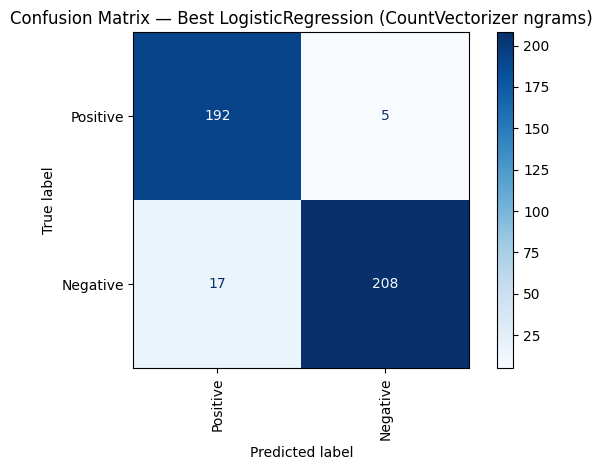

In [10]:
## Logistics Regression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Vectorizer and splits are as you defined:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

logreg = LogisticRegression(random_state=0)

# Separate grids per solver to avoid invalid combos
param_grids = [
    # liblinear: supports L1 or L2
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced'],
        'max_iter': [200, 500]
    },
    # lbfgs/newton-cg: L2 only
    {
        'solver': ['lbfgs', 'newton-cg'],
        'penalty': ['l2'],
        'C': [0.1, 1, 10, 100],
        'class_weight': [None, 'balanced'],
        'max_iter': [200, 500]
    }
]

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grids,
    cv=3,                      # faster than 5; raise if you need more rigor
    scoring='accuracy',        # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid_search.fit(x_train_vectorized, y_train)

print("Best params:", grid_search.best_params_)
print("Best 3-fold CV score:", round(grid_search.best_score_, 4))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_vectorized)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — Best LogisticRegression (CountVectorizer ngrams)")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best 3-fold CV score: 0.939
KNN Test Accuracy: 0.9502

Classification report:
               precision    recall  f1-score   support

           0     0.9272    0.9695    0.9479       197
           1     0.9722    0.9333    0.9524       225

    accuracy                         0.9502       422
   macro avg     0.9497    0.9514    0.9501       422
weighted avg     0.9512    0.9502    0.9503       422



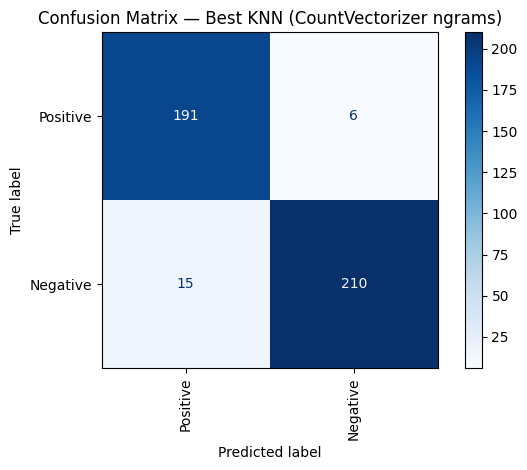

In [11]:
# K-Nearest-Neighbour
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Vectorizer and splits are as you defined:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

knn = KNeighborsClassifier(n_jobs=-1)

# Two compact grids: cosine (recommended) and euclidean (as a fallback)
param_grids = [
    {
        'algorithm': ['brute'],
        'metric': ['cosine'],                 # great for text similarity
        'n_neighbors': [3, 5, 7, 11, 15],
        'weights': ['uniform', 'distance']
    },
    {
        'algorithm': ['brute'],
        'metric': ['euclidean'],              # try once in case it works better
        'n_neighbors': [3, 5, 7, 11, 15],
        'weights': ['uniform', 'distance']
    }
]

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grids,
    cv=3,                      # faster than 5; increase if you need more rigor
    scoring='accuracy',        # use 'f1_macro' if the classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid_search.fit(x_train_vectorized, y_train)

print("Best params:", grid_search.best_params_)
print("Best 3-fold CV score:", round(grid_search.best_score_, 4))

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(x_test_vectorized)
acc = accuracy_score(y_test, y_pred)
print("KNN Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_knn,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — Best KNN (CountVectorizer ngrams)")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.8}
Best 3-fold CV score: 0.9508
XGBoost Test Accuracy: 0.9645

Classification report:
               precision    recall  f1-score   support

           0     0.9417    0.9848    0.9628       197
           1     0.9861    0.9467    0.9660       225

    accuracy                         0.9645       422
   macro avg     0.9639    0.9657    0.9644       422
weighted avg     0.9654    0.9645    0.9645       422



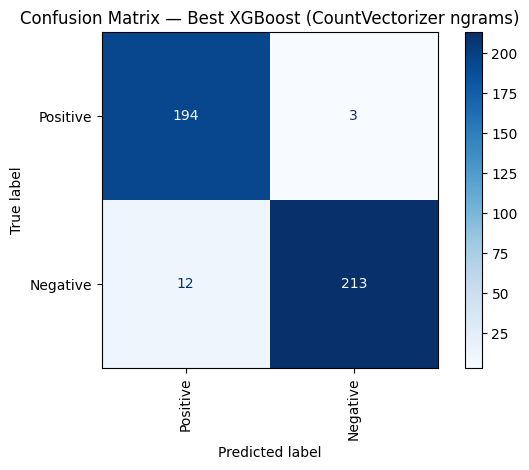

In [12]:
#XGBoost
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# --- Vectorization & split ---
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- XGBoost classifier ---
xgb = XGBClassifier(
    objective='binary:logistic',   # use 'multi:softprob' + num_class for multi-class
    eval_metric='logloss',
    tree_method='hist',            # faster tree method
    n_jobs=-1,
    random_state=0,
    verbosity=0
)

# --- Grid search space ---
param_grid = {
    'n_estimators': [200, 500],
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 6],
    'min_child_weight': [1, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.5, 1.0],
    'reg_alpha': [0, 0.5],    # L1
    'reg_lambda': [1, 2]      # L2
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',        # swap to 'f1_macro' if imbalance
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit grid search ---
grid_search.fit(x_train_vectorized, y_train)

print("Best params:", grid_search.best_params_)
print("Best 3-fold CV score:", round(grid_search.best_score_, 4))

# --- Evaluate best model ---
best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(x_test_vectorized)
acc = accuracy_score(y_test, y_pred)
print("XGBoost Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_xgb,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — Best XGBoost (CountVectorizer ngrams)")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best 3-fold CV score: 0.9532
RandomForest Test Accuracy: 0.9716

Classification report:
               precision    recall  f1-score   support

           0     0.9695    0.9695    0.9695       197
           1     0.9733    0.9733    0.9733       225

    accuracy                         0.9716       422
   macro avg     0.9714    0.9714    0.9714       422
weighted avg     0.9716    0.9716    0.9716       422



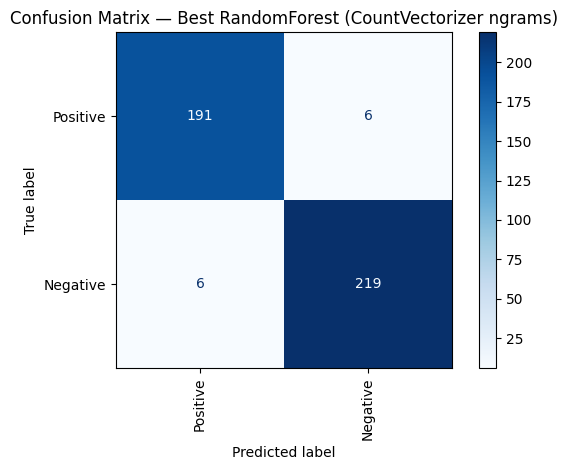

In [13]:
# Random Forest
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# --- Vectorization & split ---
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- Random Forest classifier ---
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# --- Fast, effective grid for sparse text ---
param_grid = {
    'n_estimators': [100, 200],          # fewer trees for speed
    'max_depth': [None, 20],             # unlimited vs capped
    'max_features': ['sqrt', 0.25],      # feature subsampling
    'min_samples_split': [2, 5],         # regularize splits
    'min_samples_leaf': [1, 2],          # regularize leaves
    'bootstrap': [True],
    'max_samples': [0.8],                # row subsampling (speeds each tree)
    'criterion': ['gini'],               # faster than 'log_loss'
    'class_weight': [None, 'balanced_subsample']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                      # faster than 5; increase for more rigor
    scoring='accuracy',        # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit grid search ---
grid_search.fit(x_train_vectorized, y_train)

print("Best params:", grid_search.best_params_)
print("Best 3-fold CV score:", round(grid_search.best_score_, 4))

# --- Evaluate best model ---
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test_vectorized)
acc = accuracy_score(y_test, y_pred)
print("RandomForest Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_rf,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],  # adjust if your labels differ
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — Best RandomForest (CountVectorizer ngrams)")
plt.tight_layout()
plt.show()

=== LinearSVC Grid Search ===
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'C': 0.1, 'class_weight': None, 'loss': 'squared_hinge', 'max_iter': 2000}
Best 3-fold CV score: 0.9461
LinearSVC Test Accuracy: 0.9573

Classification report:
               precision    recall  f1-score   support

           0     0.9409    0.9695    0.9550       197
           1     0.9726    0.9467    0.9595       225

    accuracy                         0.9573       422
   macro avg     0.9567    0.9581    0.9572       422
weighted avg     0.9578    0.9573    0.9574       422



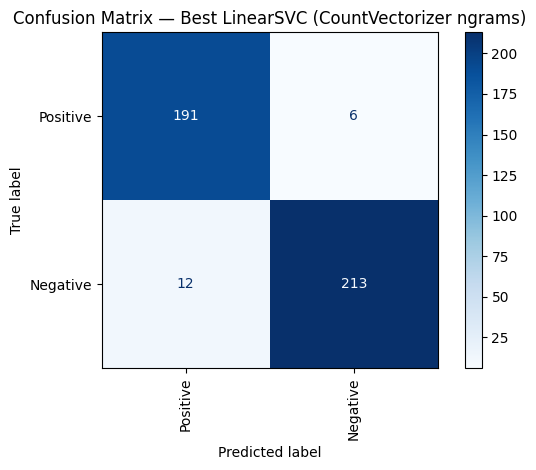

In [14]:
# SVM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt

# --- Vectorization & split ---
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# ----------------------------
# Option A: LinearSVC (FAST)
# ----------------------------
lsvc = LinearSVC(random_state=0, dual=True)  # dual=True is good when n_features >> n_samples

lsvc_param_grid = {
    'C': [0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
    'class_weight': [None, 'balanced'],
    'max_iter': [2000]  # ensure convergence
}

lsvc_grid = GridSearchCV(
    estimator=lsvc,
    param_grid=lsvc_param_grid,
    cv=3,
    scoring='accuracy',        # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

print("=== LinearSVC Grid Search ===")
lsvc_grid.fit(x_train_vectorized, y_train)
print("Best params:", lsvc_grid.best_params_)
print("Best 3-fold CV score:", round(lsvc_grid.best_score_, 4))

best_lsvc = lsvc_grid.best_estimator_
y_pred = best_lsvc.predict(x_test_vectorized)
acc = accuracy_score(y_test, y_pred)
print("LinearSVC Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_lsvc,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — Best LinearSVC (CountVectorizer ngrams)")
plt.tight_layout()
plt.show()



Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'clf': BernoulliNB(), 'clf__alpha': 0.5, 'clf__binarize': 0.0, 'clf__fit_prior': True}
Best 3-fold CV score: 0.9401
Naive Bayes Test Accuracy: 0.9502

Classification report:
               precision    recall  f1-score   support

           0     0.9314    0.9645    0.9476       197
           1     0.9679    0.9378    0.9526       225

    accuracy                         0.9502       422
   macro avg     0.9496    0.9511    0.9501       422
weighted avg     0.9508    0.9502    0.9503       422



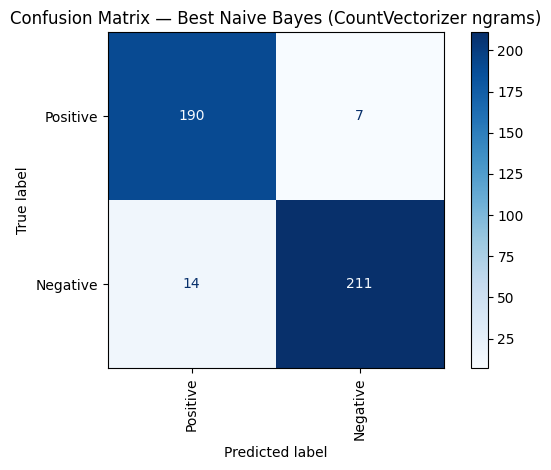

In [15]:
# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# --- Vectorization & split ---
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- Pipeline with a placeholder classifier so we can grid over different NB types ---
pipe = Pipeline([
    ('clf', MultinomialNB())  # placeholder; will be overridden by grid
])

# --- Grid over NB variants and their key params ---
param_grid = [
    {
        'clf': [MultinomialNB()],
        'clf__alpha': [0.1, 0.5, 1.0],   # smoothing
        'clf__fit_prior': [True, False]
    },
    {
        'clf': [ComplementNB()],
        'clf__alpha': [0.1, 0.5, 1.0],
        'clf__fit_prior': [True, False],
        # class_prior could be tuned if you have known priors
    },
    {
        'clf': [BernoulliNB()],
        'clf__alpha': [0.1, 0.5, 1.0],
        'clf__binarize': [0.0, 0.5, 1.0],  # threshold to binarize counts; 0.0 keeps all as 1s if >0
        'clf__fit_prior': [True, False]
    }
]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,                       # bump to 5 for more rigor
    scoring='accuracy',         # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit on the already-vectorized matrices via a small wrapper ---
# Since our pipeline has only the classifier, we can pass precomputed X directly.
grid_search.fit(x_train_vectorized, y_train)

print("Best params:", grid_search.best_params_)
print("Best 3-fold CV score:", round(grid_search.best_score_, 4))

best_nb = grid_search.best_estimator_

y_pred = best_nb.predict(x_test_vectorized)
acc = accuracy_score(y_test, y_pred)
print("Naive Bayes Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_nb,
    x_test_vectorized,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — Best Naive Bayes (CountVectorizer ngrams)")
plt.tight_layout()
plt.show()

## HashingVectorizer

Fitting 3 folds for each of 28 candidates, totalling 84 fits
Best params: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__max_iter': 500, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best 3-fold CV score: 0.92
Logistic Regression (HashingVectorizer) Test Accuracy: 0.9431

Classification report:
               precision    recall  f1-score   support

           0     0.9100    0.9746    0.9412       197
           1     0.9763    0.9156    0.9450       225

    accuracy                         0.9431       422
   macro avg     0.9431    0.9451    0.9431       422
weighted avg     0.9453    0.9431    0.9432       422



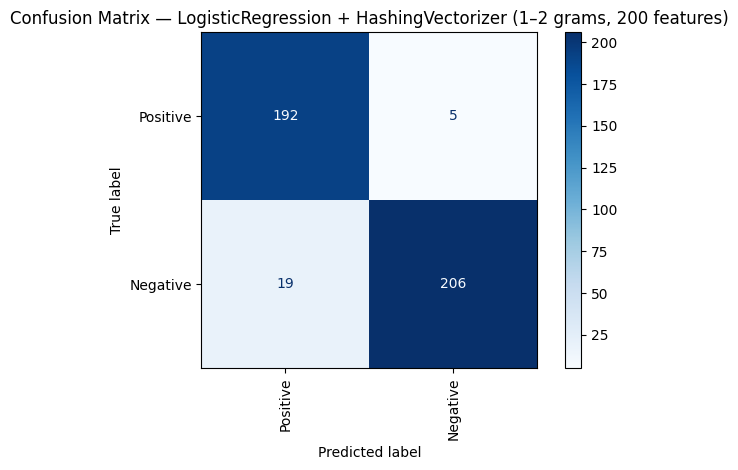

In [16]:
#Logistics Regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# --- Data ---
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --- Pipeline: HashingVectorizer -> LogisticRegression ---
pipe = Pipeline([
    ('vect', HashingVectorizer(
        ngram_range=(1, 2),
        n_features=200,
        alternate_sign=False,   # more stable for linear models
        norm=None,              # raw counts; you can set 'l2' if you want
        stop_words='english'
    )),
    ('clf', LogisticRegression(random_state=0))
])

# --- Per-solver grids (avoid invalid combos) ---
param_grid = [
    {   # liblinear supports L1 and L2
        'clf__solver': ['liblinear'],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.1, 1, 10],
        'clf__class_weight': [None, 'balanced'],
        'clf__max_iter': [500]
    },
    {   # lbfgs/newton-cg: L2 only
        'clf__solver': ['lbfgs', 'newton-cg'],
        'clf__penalty': ['l2'],
        'clf__C': [0.1, 1, 10, 100],
        'clf__class_weight': [None, 'balanced'],
        'clf__max_iter': [500]
    }
]

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',      # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit & evaluate ---
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best 3-fold CV score:", round(grid.best_score_, 4))

best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression (HashingVectorizer) Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — LogisticRegression + HashingVectorizer (1–2 grams, 200 features)")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'clf__algorithm': 'brute', 'clf__metric': 'cosine', 'clf__n_neighbors': 11, 'clf__weights': 'distance'}
Best 3-fold CV score: 0.9111
KNN (HashingVectorizer) Test Accuracy: 0.9052

Classification report:
               precision    recall  f1-score   support

           0     0.8685    0.9391    0.9024       197
           1     0.9426    0.8756    0.9078       225

    accuracy                         0.9052       422
   macro avg     0.9056    0.9073    0.9051       422
weighted avg     0.9080    0.9052    0.9053       422



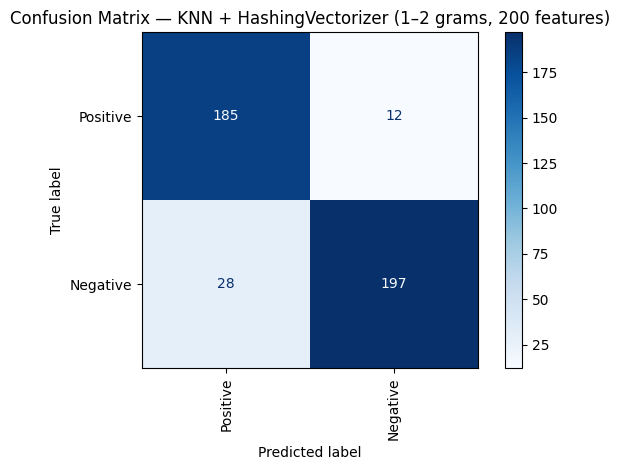

In [17]:
# K-Nearest-Neighour
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# --- Data ---
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --- Pipeline: HashingVectorizer -> KNN ---
pipe = Pipeline([
    ('vect', HashingVectorizer(
        ngram_range=(1, 2),
        n_features=200,
        alternate_sign=False,    # stable for linear distance metrics
        norm='l2',               # good with cosine and helps Euclidean behave like cosine
        stop_words='english'
    )),
    ('clf', KNeighborsClassifier(n_jobs=-1))
])

# --- Compact, text-friendly grid ---
param_grid = [
    {   # cosine distance (recommended for text)
        'clf__algorithm': ['brute'],
        'clf__metric': ['cosine'],
        'clf__n_neighbors': [3, 5, 11],
        'clf__weights': ['uniform', 'distance']
    },
    {   # small Euclidean fallback
        'clf__algorithm': ['brute'],
        'clf__metric': ['euclidean'],
        'clf__n_neighbors': [5, 11],
        'clf__weights': ['uniform', 'distance']
    }
]

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,                    # bump to 5 for more rigor
    scoring='accuracy',      # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit & evaluate ---
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best 3-fold CV score:", round(grid.best_score_, 4))

best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("KNN (HashingVectorizer) Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=['Positive', 'Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — KNN + HashingVectorizer (1–2 grams, 200 features)")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Best params: {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__min_child_weight': 1, 'clf__n_estimators': 500, 'clf__reg_alpha': 0, 'clf__reg_lambda': 1, 'clf__subsample': 0.8}
Best 3-fold CV score: 0.9431
XGBoost (HashingVectorizer) Test Accuracy: 0.9621

Classification report:
               precision    recall  f1-score   support

           0     0.9548    0.9645    0.9596       197
           1     0.9686    0.9600    0.9643       225

    accuracy                         0.9621       422
   macro avg     0.9617    0.9622    0.9619       422
weighted avg     0.9622    0.9621    0.9621       422



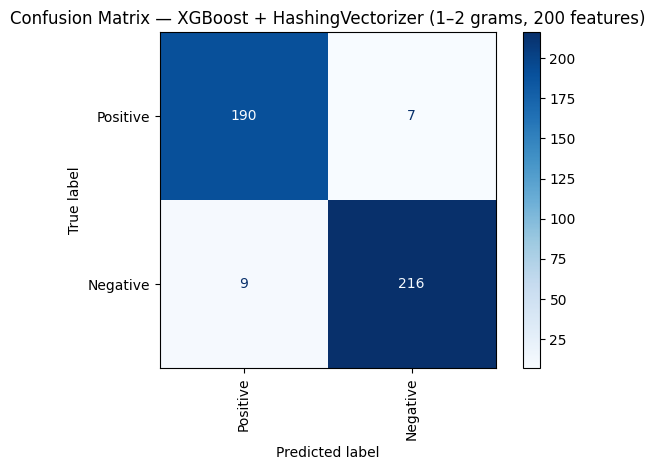

In [18]:
#XGBoost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# --- Data ---
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --- Pipeline: HashingVectorizer -> XGBoost ---
pipe = Pipeline([
    ('vect', HashingVectorizer(
        ngram_range=(1, 2),
        n_features=200,
        alternate_sign=False,   # stable for tree/linear models
        norm=None,              # trees work fine with raw counts
        stop_words='english'
    )),
    ('clf', XGBClassifier(
        objective='binary:logistic',  # for multi-class: 'multi:softprob' + set num_class
        eval_metric='logloss',
        tree_method='hist',
        n_jobs=-1,
        random_state=0,
        verbosity=0
    ))
])

# --- Compact grid (fast but effective) ---
param_grid = {
    'clf__n_estimators': [200, 500],
    'clf__learning_rate': [0.1, 0.3],
    'clf__max_depth': [3, 6],
    'clf__min_child_weight': [1, 5],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.5, 1.0],
    'clf__reg_alpha': [0, 0.5],
    'clf__reg_lambda': [1, 2],
    # If classes are imbalanced, consider also tuning scale_pos_weight:
    # 'clf__scale_pos_weight': [1, (y_train == 0).sum() / max(1, (y_train == 1).sum())]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',      # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit & evaluate ---
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best 3-fold CV score:", round(grid.best_score_, 4))

best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("XGBoost (HashingVectorizer) Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=['Positive', 'Negative'],  # adjust if your labels differ
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — XGBoost + HashingVectorizer (1–2 grams, 200 features)")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'clf__bootstrap': True, 'clf__class_weight': None, 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best 3-fold CV score: 0.9378
Random Forest (HashingVectorizer) Test Accuracy: 0.9645

Classification report:
               precision    recall  f1-score   support

           0     0.9417    0.9848    0.9628       197
           1     0.9861    0.9467    0.9660       225

    accuracy                         0.9645       422
   macro avg     0.9639    0.9657    0.9644       422
weighted avg     0.9654    0.9645    0.9645       422



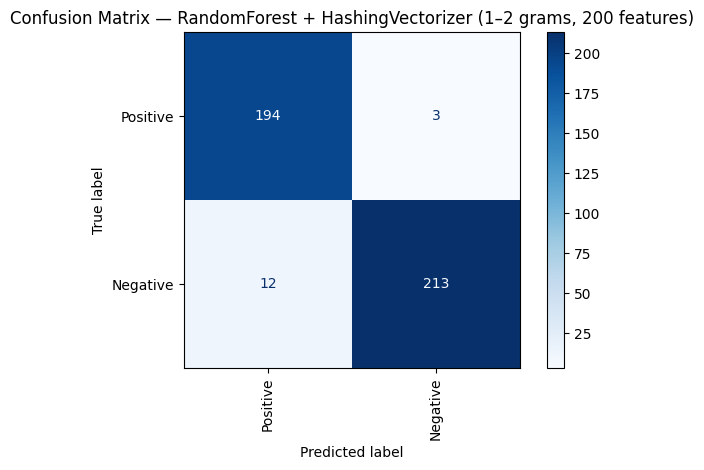

In [19]:
# Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# --- Data ---
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --- Pipeline: HashingVectorizer -> RandomForest ---
pipe = Pipeline([
    ('vect', HashingVectorizer(
        ngram_range=(1, 2),
        n_features=200,
        alternate_sign=False,   # stable for trees
        norm=None,              # trees don't need normalization
        stop_words='english'
    )),
    ('clf', RandomForestClassifier(
        random_state=0,
        n_jobs=-1
    ))
])

# --- Small, fast grid (8 total combos) ---
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 20],
    'clf__max_features': ['sqrt', 0.25],
    'clf__min_samples_split': [2],     # fixed to default (speed)
    'clf__min_samples_leaf': [1],      # fixed to default
    'clf__bootstrap': [True],
    'clf__class_weight': [None]        # set to 'balanced_subsample' if needed
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',      # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit & evaluate ---
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best 3-fold CV score:", round(grid.best_score_, 4))

best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Random Forest (HashingVectorizer) Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=['Positive', 'Negative'],  # adjust to your labels
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — RandomForest + HashingVectorizer (1–2 grams, 200 features)")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best params: {'clf__C': 0.1, 'clf__class_weight': None, 'clf__loss': 'squared_hinge', 'clf__max_iter': 2000}
Best 3-fold CV score: 0.9194
SVM (LinearSVC + HashingVectorizer) Test Accuracy: 0.9431

Classification report:
               precision    recall  f1-score   support

           0     0.9220    0.9594    0.9403       197
           1     0.9631    0.9289    0.9457       225

    accuracy                         0.9431       422
   macro avg     0.9425    0.9441    0.9430       422
weighted avg     0.9439    0.9431    0.9432       422



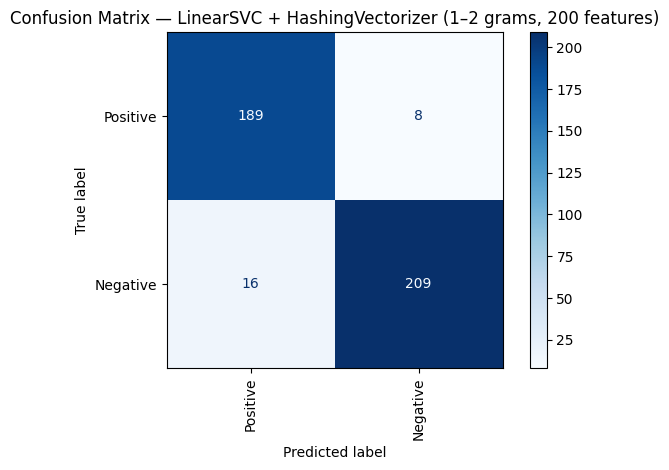

In [20]:
# SVM
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Data ---
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --- Pipeline: HashingVectorizer -> LinearSVC ---
pipe = Pipeline([
    ('vect', HashingVectorizer(
        ngram_range=(1, 2),
        n_features=200,
        alternate_sign=False,   # more stable for linear models
        norm='l2',              # good default for SVMs
        stop_words='english'
    )),
    ('clf', LinearSVC(random_state=0, dual=True))
])

# --- Small, fast grid (6 combos total) ---
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__loss': ['squared_hinge'],   # (faster/stabler than 'hinge')
    'clf__class_weight': [None, 'balanced'],
    # fix max_iter to ensure convergence; bump if you see warnings
    'clf__max_iter': [2000]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,                       # raise to 5 for more rigor
    scoring='accuracy',         # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit & evaluate ---
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best 3-fold CV score:", round(grid.best_score_, 4))

best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("SVM (LinearSVC + HashingVectorizer) Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=['Positive', 'Negative'],  # adjust to your labels
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — LinearSVC + HashingVectorizer (1–2 grams, 200 features)")
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'clf': BernoulliNB(), 'clf__alpha': 0.5, 'clf__binarize': 0.0, 'clf__fit_prior': True}
Best 3-fold CV score: 0.8957
Naive Bayes (HashingVectorizer) Test Accuracy: 0.9005

Classification report:
               precision    recall  f1-score   support

           0     0.8571    0.9442    0.8986       197
           1     0.9463    0.8622    0.9023       225

    accuracy                         0.9005       422
   macro avg     0.9017    0.9032    0.9004       422
weighted avg     0.9047    0.9005    0.9006       422



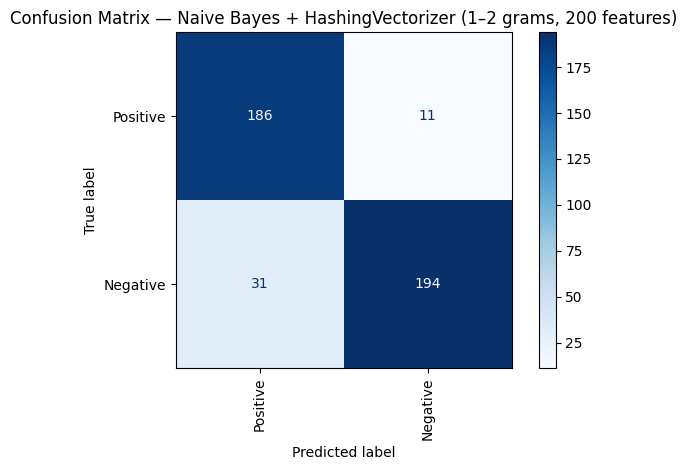

In [21]:
# Naive Bayes


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Data ---
X = df['Text']
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --- Pipeline: HashingVectorizer -> NB ---
pipe = Pipeline([
    ('vect', HashingVectorizer(
        ngram_range=(1, 2),
        n_features=200,
        alternate_sign=False,   # avoid negative values (NB needs non-negative features)
        norm=None,
        stop_words='english'
    )),
    ('clf', MultinomialNB())   # placeholder, replaced in grid
])

# --- Grid: MultinomialNB, ComplementNB, BernoulliNB ---
param_grid = [
    {
        'clf': [MultinomialNB()],
        'clf__alpha': [0.1, 0.5, 1.0],
        'clf__fit_prior': [True, False]
    },
    {
        'clf': [ComplementNB()],
        'clf__alpha': [0.1, 0.5, 1.0],
        'clf__fit_prior': [True, False]
    },
    {
        'clf': [BernoulliNB()],
        'clf__alpha': [0.1, 0.5, 1.0],
        'clf__binarize': [0.0, 0.5, 1.0],
        'clf__fit_prior': [True, False]
    }
]

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,                       # 3-fold for speed; raise to 5 for more rigor
    scoring='accuracy',         # use 'f1_macro' if classes are imbalanced
    n_jobs=-1,
    verbose=1,
    refit=True
)

# --- Fit & evaluate ---
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best 3-fold CV score:", round(grid.best_score_, 4))

best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Naive Bayes (HashingVectorizer) Test Accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(
    best_model,
    x_test,
    y_test,
    display_labels=['Positive', 'Negative'],  # adjust to your labels
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix — Naive Bayes + HashingVectorizer (1–2 grams, 200 features)")
plt.tight_layout()
plt.show()

## Alternative methods

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# ------------------
# Data split
# ------------------
X = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ------------------
# Vectorizers
# ------------------
vectorizers = {
    "Count": CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=5),
    "TFIDF": TfidfVectorizer(ngram_range=(1, 2), stop_words='english', min_df=5),
    "Hashing": HashingVectorizer(ngram_range=(1, 2), n_features=200,
                                 alternate_sign=False, stop_words='english')
}

# ------------------
# Models + small grids (fast)
# ------------------
models = {
    # (1) Logistic Regression
    "LR": (
        LogisticRegression(random_state=0, max_iter=1000, solver="liblinear"),
        {'clf__C': [0.1, 1, 10]}
    ),

    # (2) KNN (cosine works well for text)
    "KNN": (
        KNeighborsClassifier(n_jobs=-1),
        [
            {'clf__algorithm': ['brute'], 'clf__metric': ['cosine'],
             'clf__n_neighbors': [5, 11], 'clf__weights': ['uniform', 'distance']},
            {'clf__algorithm': ['brute'], 'clf__metric': ['euclidean'],
             'clf__n_neighbors': [5, 11], 'clf__weights': ['uniform', 'distance']}
        ]
    ),

    # (3) Random Forest
    "RF": (
        RandomForestClassifier(random_state=0, n_jobs=-1),
        {'clf__n_estimators': [100], 'clf__max_depth': [None, 20],
         'clf__max_features': ['sqrt']}
    ),

    # (4) XGBoost
    "XGBoost": (
        XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                      tree_method='hist', n_jobs=-1, random_state=0, verbosity=0),
        {'clf__n_estimators': [100], 'clf__max_depth': [3, 6]}
    ),

    # (5) SVM (linear)
    "SVM": (
        LinearSVC(random_state=0, dual=True, max_iter=2000),
        {'clf__C': [0.1, 1]}
    ),

    # (6) Naïve Bayes (Bernoulli) — binarize counts
    "BernoulliNB": (
        BernoulliNB(),
        {'clf__alpha': [0.1, 1.0], 'clf__binarize': [0.0, 0.5]}
    )
}

# ------------------
# Train/evaluate all combos
# ------------------
rows = []
best_models = {}

for vname, vect in vectorizers.items():
    for mname, (estimator, grid_params) in models.items():
        name = f"{vname} + {mname}"
        pipe = Pipeline([('vect', vect), ('clf', estimator)])
        grid = GridSearchCV(
            pipe, param_grid=grid_params, cv=3,
            scoring='accuracy', n_jobs=-1, refit=True, verbose=0
        )
        grid.fit(x_train, y_train)
        best = grid.best_estimator_
        test_pred = best.predict(x_test)
        test_acc = accuracy_score(y_test, test_pred)

        rows.append({
            "Vectorizer": vname,
            "Model": mname,
            "Best_CV_Acc": round(grid.best_score_, 4),
            "Test_Acc": round(test_acc, 4),
            "Best_Params": grid.best_params_
        })
        best_models[name] = best
        print(f"{name}: CV={round(grid.best_score_, 4)}, Test={round(test_acc, 4)}")



results_df = pd.DataFrame(rows).sort_values("Test_Acc", ascending=False).reset_index(drop=True)
print("\n=== Ranked Results (by Test Accuracy) ===")
print(results_df[["Vectorizer", "Model", "Best_CV_Acc", "Test_Acc"]])

best_row = results_df.iloc[0]
best_name = f"{best_row['Vectorizer']} + {best_row['Model']}"
print(f"\nBest overall: {best_name} with Test Accuracy = {best_row['Test_Acc']}")
best_overall_model = best_models[best_name]

Count + LR: CV=0.9591, Test=0.9763
Count + KNN: CV=0.9342, Test=0.9408
Count + RF: CV=0.9591, Test=0.9716
Count + XGBoost: CV=0.9502, Test=0.9668
Count + SVM: CV=0.9585, Test=0.9763
Count + BernoulliNB: CV=0.9544, Test=0.981
TFIDF + LR: CV=0.9609, Test=0.9858
TFIDF + KNN: CV=0.8951, Test=0.8791
TFIDF + RF: CV=0.9573, Test=0.981
TFIDF + XGBoost: CV=0.955, Test=0.9763
TFIDF + SVM: CV=0.9627, Test=0.9834
TFIDF + BernoulliNB: CV=0.9544, Test=0.981
Hashing + LR: CV=0.9182, Test=0.9479
Hashing + KNN: CV=0.9111, Test=0.9052
Hashing + RF: CV=0.9354, Test=0.9621
Hashing + XGBoost: CV=0.9384, Test=0.9645
Hashing + SVM: CV=0.9194, Test=0.9431
Hashing + BernoulliNB: CV=0.8957, Test=0.9005

=== Ranked Results (by Test Accuracy) ===
   Vectorizer        Model  Best_CV_Acc  Test_Acc
0       TFIDF           LR       0.9609    0.9858
1       TFIDF          SVM       0.9627    0.9834
2       TFIDF  BernoulliNB       0.9544    0.9810
3       Count  BernoulliNB       0.9544    0.9810
4       TFIDF        

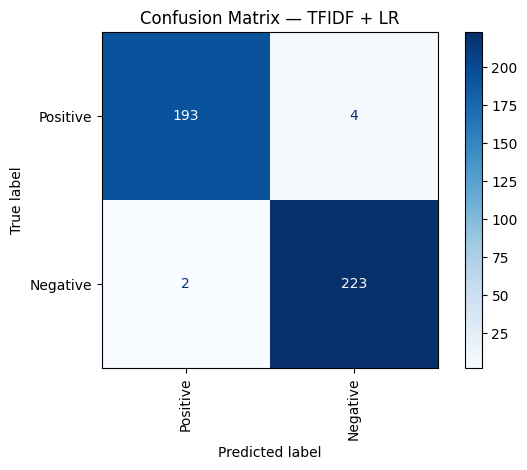

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test is already defined, best_overall_model is from your results loop
y_pred = best_overall_model.predict(x_test)

# --- Confusion Matrix for Best Model ---
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Positive', 'Negative'],  # adjust to your dataset’s labels
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.title(f"Confusion Matrix — {best_name}")
plt.tight_layout()
plt.show()

In [31]:
text = " Public transport makes air so clean "

# If the best model supports predict_proba (LogReg, RF, XGBoost, NB, etc.)
if hasattr(best_overall_model, "predict_proba"):
    score = best_overall_model.predict_proba([text])[0][1]  # probability of class 1
    if score > 0.5:
        attitude = "negative"
    else:
        attitude = "positive"
    print(f"The prediction result of this review is: {attitude} (score={score:.4f})")

# If the best model does not support predict_proba (e.g., LinearSVC)
else:
    pred = best_overall_model.predict([text])[0]
    print(f"The prediction result of this review is: {pred}")

The prediction result of this review is: negative (score=0.5793)
